In [289]:
import pandas as pd
import numpy as np
import re

## 1. Import emmeans results for lmer model generated in R
- e.g.:
    - ``mod_F1 <- lmer(scale(F1_norm) ~ scale(phone_dur) + scale(fem_self_rate) + scale(gender_norm_self_rate) +`` <br>
      ``               L1s + race_ethn + phones * sexuality_gender + (1 | words),`` <br>
      ``               data = formants)``
      
    - ``em_F1 <- emmeans(mod_F1, list(pairwise ~ sexuality_gender,`` <br>
      ``                              pairwise ~ phones:sexuality_gender),`` <br>
      ``                 pbkrtest.limit = 3e6, lmerTest.limit = 3e6,`` <br> 
      ``                 rg.limit = 3e6, adjust="bonferroni")``
 
    - ``capture.output(em_F1, file = "em_F1.txt")``
- Easier to deal with if col names are removed from the txt before reading in

In [290]:
df = pd.read_csv('F1_mod_medians.txt', sep=r'\s+', index_col=False, header=None)

In [291]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,AA1,heterosexual,masculine,-,AE1,heterosexual,masculine,-0.22200,0.1276,25060,-1.736,1.0000
1,AA1,heterosexual,masculine,-,AH1,heterosexual,masculine,-0.33700,0.1377,25704,-2.449,1.0000
2,AA1,heterosexual,masculine,-,AO1,heterosexual,masculine,-0.23000,0.1382,23634,-1.667,1.0000
3,AA1,heterosexual,masculine,-,EH1,heterosexual,masculine,-0.12300,0.1189,26130,-1.036,1.0000
4,AA1,heterosexual,masculine,-,ER1,heterosexual,masculine,-0.25400,0.1682,25284,-1.511,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,IY1,heterosexual,feminine,-,UH1,heterosexual,feminine,0.01810,0.1128,8013,0.160,1.0000
2552,IY1,heterosexual,feminine,-,UW1,heterosexual,feminine,-0.02970,0.0632,3374,-0.471,1.0000
2553,OW1,heterosexual,feminine,-,UH1,heterosexual,feminine,-0.00394,0.1128,6507,-0.035,1.0000
2554,OW1,heterosexual,feminine,-,UW1,heterosexual,feminine,-0.05180,0.0631,2126,-0.821,1.0000


## 2. Join parts of comparison col into single col

In [292]:
df['pairs'] = df[[0, 1, 2, 3, 4, 5, 6]].agg(' '.join, axis=1)

In [293]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,pairs
0,AA1,heterosexual,masculine,-,AE1,heterosexual,masculine,-0.22200,0.1276,25060,-1.736,1.0000,AA1 heterosexual masculine - AE1 heterosexual ...
1,AA1,heterosexual,masculine,-,AH1,heterosexual,masculine,-0.33700,0.1377,25704,-2.449,1.0000,AA1 heterosexual masculine - AH1 heterosexual ...
2,AA1,heterosexual,masculine,-,AO1,heterosexual,masculine,-0.23000,0.1382,23634,-1.667,1.0000,AA1 heterosexual masculine - AO1 heterosexual ...
3,AA1,heterosexual,masculine,-,EH1,heterosexual,masculine,-0.12300,0.1189,26130,-1.036,1.0000,AA1 heterosexual masculine - EH1 heterosexual ...
4,AA1,heterosexual,masculine,-,ER1,heterosexual,masculine,-0.25400,0.1682,25284,-1.511,1.0000,AA1 heterosexual masculine - ER1 heterosexual ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,IY1,heterosexual,feminine,-,UH1,heterosexual,feminine,0.01810,0.1128,8013,0.160,1.0000,IY1 heterosexual feminine - UH1 heterosexual f...
2552,IY1,heterosexual,feminine,-,UW1,heterosexual,feminine,-0.02970,0.0632,3374,-0.471,1.0000,IY1 heterosexual feminine - UW1 heterosexual f...
2553,OW1,heterosexual,feminine,-,UH1,heterosexual,feminine,-0.00394,0.1128,6507,-0.035,1.0000,OW1 heterosexual feminine - UH1 heterosexual f...
2554,OW1,heterosexual,feminine,-,UW1,heterosexual,feminine,-0.05180,0.0631,2126,-0.821,1.0000,OW1 heterosexual feminine - UW1 heterosexual f...


In [294]:
df = df.iloc[:, 7:]
pairs = df.pop('pairs')
df.insert(0, 'pairs', pairs)

In [295]:
df

,pairs,7,8,9,10,11
0,AA1 heterosexual masculine - AE1 heterosexual ...,-0.22200,0.1276,25060,-1.736,1.0000
1,AA1 heterosexual masculine - AH1 heterosexual ...,-0.33700,0.1377,25704,-2.449,1.0000
2,AA1 heterosexual masculine - AO1 heterosexual ...,-0.23000,0.1382,23634,-1.667,1.0000
3,AA1 heterosexual masculine - EH1 heterosexual ...,-0.12300,0.1189,26130,-1.036,1.0000
4,AA1 heterosexual masculine - ER1 heterosexual ...,-0.25400,0.1682,25284,-1.511,1.0000
...,...,...,...,...,...,...
2551,IY1 heterosexual feminine - UH1 heterosexual f...,0.01810,0.1128,8013,0.160,1.0000
2552,IY1 heterosexual feminine - UW1 heterosexual f...,-0.02970,0.0632,3374,-0.471,1.0000
2553,OW1 heterosexual feminine - UH1 heterosexual f...,-0.00394,0.1128,6507,-0.035,1.0000
2554,OW1 heterosexual feminine - UW1 heterosexual f...,-0.05180,0.0631,2126,-0.821,1.0000


## 3. Add col names back in

In [296]:
df = df.set_axis(['pairs', 'estimate', 'SE', 'df', 't-ratio', 'p-value'], axis=1)
df

,pairs,estimate,SE,df,t-ratio,p-value
0,AA1 heterosexual masculine - AE1 heterosexual ...,-0.22200,0.1276,25060,-1.736,1.0000
1,AA1 heterosexual masculine - AH1 heterosexual ...,-0.33700,0.1377,25704,-2.449,1.0000
2,AA1 heterosexual masculine - AO1 heterosexual ...,-0.23000,0.1382,23634,-1.667,1.0000
3,AA1 heterosexual masculine - EH1 heterosexual ...,-0.12300,0.1189,26130,-1.036,1.0000
4,AA1 heterosexual masculine - ER1 heterosexual ...,-0.25400,0.1682,25284,-1.511,1.0000
...,...,...,...,...,...,...
2551,IY1 heterosexual feminine - UH1 heterosexual f...,0.01810,0.1128,8013,0.160,1.0000
2552,IY1 heterosexual feminine - UW1 heterosexual f...,-0.02970,0.0632,3374,-0.471,1.0000
2553,OW1 heterosexual feminine - UH1 heterosexual f...,-0.00394,0.1128,6507,-0.035,1.0000
2554,OW1 heterosexual feminine - UW1 heterosexual f...,-0.05180,0.0631,2126,-0.821,1.0000


## 4. Deal with float and string type p-values separately

In [298]:
df1 = df[df['p-value'] != '<.0001']
df1

,pairs,estimate,SE,df,t-ratio,p-value
0,AA1 heterosexual masculine - AE1 heterosexual ...,-0.22200,0.1276,25060,-1.736,1.0000
1,AA1 heterosexual masculine - AH1 heterosexual ...,-0.33700,0.1377,25704,-2.449,1.0000
2,AA1 heterosexual masculine - AO1 heterosexual ...,-0.23000,0.1382,23634,-1.667,1.0000
3,AA1 heterosexual masculine - EH1 heterosexual ...,-0.12300,0.1189,26130,-1.036,1.0000
4,AA1 heterosexual masculine - ER1 heterosexual ...,-0.25400,0.1682,25284,-1.511,1.0000
...,...,...,...,...,...,...
2551,IY1 heterosexual feminine - UH1 heterosexual f...,0.01810,0.1128,8013,0.160,1.0000
2552,IY1 heterosexual feminine - UW1 heterosexual f...,-0.02970,0.0632,3374,-0.471,1.0000
2553,OW1 heterosexual feminine - UH1 heterosexual f...,-0.00394,0.1128,6507,-0.035,1.0000
2554,OW1 heterosexual feminine - UW1 heterosexual f...,-0.05180,0.0631,2126,-0.821,1.0000


In [299]:
df2 = df[df['p-value'] == '<.0001']
df2

,pairs,estimate,SE,df,t-ratio,p-value
1400,(UW1 sapphic non-binary) - (IY1 bi+ non-binary),0.568,0.1003,13340,5.661,<.0001
1447,AA1 gay masculine - (IY1 bi+ non-binary),0.433,0.0717,9738,6.037,<.0001
1493,AE1 gay masculine - (IY1 bi+ non-binary),0.481,0.0653,8616,7.363,<.0001
1503,AE1 gay masculine - (EY1 bi+ feminine),0.323,0.0560,7312,5.765,<.0001
1513,AE1 gay masculine - EH1 heterosexual feminine,0.304,0.0534,9403,5.693,<.0001
1515,AE1 gay masculine - EY1 heterosexual feminine,0.340,0.0564,7379,6.038,<.0001
1516,AE1 gay masculine - IH1 heterosexual feminine,0.356,0.0578,9465,6.158,<.0001
1518,AE1 gay masculine - OW1 heterosexual feminine,0.335,0.0581,3624,5.771,<.0001
1825,OW1 gay masculine - (IY1 bi+ non-binary),0.357,0.0630,3301,5.672,<.0001
1933,(AA1 bi+ non-binary) - (IY1 bi+ non-binary),0.487,0.0709,7338,6.866,<.0001


In [301]:
df1['p-value'] = df1['p-value'].astype(float)
df1 = df1[df1['p-value'] < 0.05]
df1.head()

/var/folders/_p/8f1m1pq55m96ch4vpbjsm5zh0000gn/T/ipykernel_87362/491614182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['p-value'] = df1['p-value'].astype(float)


,pairs,estimate,SE,df,t-ratio,p-value
113,AE1 heterosexual masculine - (IY1 bi+ non-binary),0.447,0.0985,17609,4.535,0.0148
182,AH1 heterosexual masculine - (IY1 bi+ non-binary),0.562,0.1118,20176,5.026,0.0013
512,IH1 heterosexual masculine - (IY1 bi+ non-binary),0.450,0.1035,21034,4.349,0.0351
575,IY1 heterosexual masculine - (IY1 bi+ non-binary),0.451,0.0953,30624,4.734,0.0056
1043,(EH1 sapphic non-binary) - (IY1 bi+ non-binary),0.329,0.0746,13190,4.402,0.0276


## 5. Join full dataset back together

In [302]:
df_comb = pd.concat([df1, df2], axis=0)
df_comb.head()

,pairs,estimate,SE,df,t-ratio,p-value
113,AE1 heterosexual masculine - (IY1 bi+ non-binary),0.447,0.0985,17609,4.535,0.0148
182,AH1 heterosexual masculine - (IY1 bi+ non-binary),0.562,0.1118,20176,5.026,0.0013
512,IH1 heterosexual masculine - (IY1 bi+ non-binary),0.450,0.1035,21034,4.349,0.0351
575,IY1 heterosexual masculine - (IY1 bi+ non-binary),0.451,0.0953,30624,4.734,0.0056
1043,(EH1 sapphic non-binary) - (IY1 bi+ non-binary),0.329,0.0746,13190,4.402,0.0276


In [303]:
#pd.set_option('display.max_rows', 100)

## 6. Make sortable by pairs by removing parens

In [304]:
df_comb['pairs'] = df_comb['pairs'].str.replace(')', '')
df_comb['pairs'] = df_comb['pairs'].str.replace('(', '')

In [305]:
df_comb.sort_values(by=['pairs'])

,pairs,estimate,SE,df,t-ratio,p-value
1937,AA1 bi+ non-binary - AA1 bi+ feminine,0.319,0.0664,29298,4.804,0.004
1938,AA1 bi+ non-binary - AE1 bi+ feminine,0.309,0.0655,9203,4.713,0.0063
1950,AA1 bi+ non-binary - AE1 heterosexual feminine,0.325,0.0668,9673,4.864,0.003
1939,AA1 bi+ non-binary - AH1 bi+ feminine,0.319,0.0671,6406,4.761,0.005
1952,AA1 bi+ non-binary - AO1 heterosexual feminine,0.323,0.0701,7061,4.614,0.0103
1941,AA1 bi+ non-binary - EH1 bi+ feminine,0.291,0.0607,7637,4.797,0.0042
1953,AA1 bi+ non-binary - EH1 heterosexual feminine,0.310,0.0612,7755,5.063,0.0011
1943,AA1 bi+ non-binary - EY1 bi+ feminine,0.329,0.0631,6421,5.212,0.0005
1931,AA1 bi+ non-binary - EY1 bi+ non-binary,0.349,0.0674,8289,5.168,0.0006
1955,AA1 bi+ non-binary - EY1 heterosexual feminine,0.346,0.0637,6580,5.432,0.0001


## 7. Isolate first and second listed group in each pair

In [306]:
df_comb[['first', 'second']] = df['pairs'].str.split(' - ', n=1, expand=True)
df_comb.head()

,pairs,estimate,SE,df,t-ratio,p-value,first,second
113,AE1 heterosexual masculine - IY1 bi+ non-binary,0.447,0.0985,17609,4.535,0.0148,AE1 heterosexual masculine,(IY1 bi+ non-binary)
182,AH1 heterosexual masculine - IY1 bi+ non-binary,0.562,0.1118,20176,5.026,0.0013,AH1 heterosexual masculine,(IY1 bi+ non-binary)
512,IH1 heterosexual masculine - IY1 bi+ non-binary,0.450,0.1035,21034,4.349,0.0351,IH1 heterosexual masculine,(IY1 bi+ non-binary)
575,IY1 heterosexual masculine - IY1 bi+ non-binary,0.451,0.0953,30624,4.734,0.0056,IY1 heterosexual masculine,(IY1 bi+ non-binary)
1043,EH1 sapphic non-binary - IY1 bi+ non-binary,0.329,0.0746,13190,4.402,0.0276,(EH1 sapphic non-binary),(IY1 bi+ non-binary)


In [307]:
df_comb['first'] = df_comb['first'].str.replace(')', '')
df_comb['first'] = df_comb['first'].str.replace('(', '')
df_comb['second'] = df_comb['second'].str.replace('(', '')
df_comb['second'] = df_comb['second'].str.replace(')', '')

df_comb.head()

,pairs,estimate,SE,df,t-ratio,p-value,first,second
113,AE1 heterosexual masculine - IY1 bi+ non-binary,0.447,0.0985,17609,4.535,0.0148,AE1 heterosexual masculine,IY1 bi+ non-binary
182,AH1 heterosexual masculine - IY1 bi+ non-binary,0.562,0.1118,20176,5.026,0.0013,AH1 heterosexual masculine,IY1 bi+ non-binary
512,IH1 heterosexual masculine - IY1 bi+ non-binary,0.450,0.1035,21034,4.349,0.0351,IH1 heterosexual masculine,IY1 bi+ non-binary
575,IY1 heterosexual masculine - IY1 bi+ non-binary,0.451,0.0953,30624,4.734,0.0056,IY1 heterosexual masculine,IY1 bi+ non-binary
1043,EH1 sapphic non-binary - IY1 bi+ non-binary,0.329,0.0746,13190,4.402,0.0276,EH1 sapphic non-binary,IY1 bi+ non-binary


In [308]:
df_comb.shape

(96, 8)

## 8. Check if pairs are comparing the same vowel quality

In [309]:
def check_match(col1, col2):
    # Pairwise comparison: Match corresponding elements only
    matches = []
    for string, string1 in zip(col1, col2):
        if string[:2] == string1[:2]:
            matches.append('Yes')
        else:
            matches.append('No')
    return matches

In [310]:
df_comb['matches'] = check_match(df_comb['first'], df_comb['second'])

In [311]:
df_matches = df_comb[df_comb['matches'] == 'Yes']

In [312]:
df_matches.sort_values(by=['first'])

,pairs,estimate,SE,df,t-ratio,p-value,first,second,matches
1937,AA1 bi+ non-binary - AA1 bi+ feminine,0.319,0.0664,29298,4.804,0.004,AA1 bi+ non-binary,AA1 bi+ feminine,Yes
1972,AE1 bi+ non-binary - AE1 bi+ feminine,0.345,0.0587,29406,5.879,<.0001,AE1 bi+ non-binary,AE1 bi+ feminine,Yes
1984,AE1 bi+ non-binary - AE1 heterosexual feminine,0.362,0.0601,29690,6.013,<.0001,AE1 bi+ non-binary,AE1 heterosexual feminine,Yes
1498,AE1 gay masculine - AE1 bi+ feminine,0.303,0.0577,30044,5.244,0.0004,AE1 gay masculine,AE1 bi+ feminine,Yes
1510,AE1 gay masculine - AE1 heterosexual feminine,0.319,0.0586,30599,5.442,0.0001,AE1 gay masculine,AE1 heterosexual feminine,Yes
1225,IH1 sapphic non-binary - IH1 heterosexual femi...,0.341,0.0789,31001,4.324,0.0393,IH1 sapphic non-binary,IH1 heterosexual feminine,Yes
1787,IY1 gay masculine - IY1 bi+ non-binary,0.297,0.0644,30148,4.614,0.0101,IY1 gay masculine,IY1 bi+ non-binary,Yes
575,IY1 heterosexual masculine - IY1 bi+ non-binary,0.451,0.0953,30624,4.734,0.0056,IY1 heterosexual masculine,IY1 bi+ non-binary,Yes
1253,IY1 sapphic non-binary - IY1 bi+ non-binary,0.389,0.0821,30427,4.734,0.0056,IY1 sapphic non-binary,IY1 bi+ non-binary,Yes


## 9. Group p-values into bins for plotting

In [313]:
def round_p(col):
    pround = []
    for value in col:
        if value == '<.0001':
            pround.append(0.0001)
        elif value == 0.0101:
            pround.append(0.01)
        elif value == 0.0056:
            pround.append(0.01)
        elif value == 0.0393:
            pround.append(0.05)
        elif value == 0.0068:
            pround.append(0.01)
        else:
            pround.append(0.001)  # Default value if no condition is met
    return pround

In [314]:
df_matches['p-rounded'] = round_p(df_matches['p-value'])
df_matches['p-rounded'] = round(df_matches['p-rounded'], 3)

/var/folders/_p/8f1m1pq55m96ch4vpbjsm5zh0000gn/T/ipykernel_87362/685059646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['p-rounded'] = round_p(df_matches['p-value'])
/var/folders/_p/8f1m1pq55m96ch4vpbjsm5zh0000gn/T/ipykernel_87362/685059646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['p-rounded'] = round(df_matches['p-rounded'], 3)


In [315]:
df_matches

,pairs,estimate,SE,df,t-ratio,p-value,first,second,matches,p-rounded
575,IY1 heterosexual masculine - IY1 bi+ non-binary,0.451,0.0953,30624,4.734,0.0056,IY1 heterosexual masculine,IY1 bi+ non-binary,Yes,0.010
1225,IH1 sapphic non-binary - IH1 heterosexual femi...,0.341,0.0789,31001,4.324,0.0393,IH1 sapphic non-binary,IH1 heterosexual feminine,Yes,0.050
1253,IY1 sapphic non-binary - IY1 bi+ non-binary,0.389,0.0821,30427,4.734,0.0056,IY1 sapphic non-binary,IY1 bi+ non-binary,Yes,0.010
1498,AE1 gay masculine - AE1 bi+ feminine,0.303,0.0577,30044,5.244,0.0004,AE1 gay masculine,AE1 bi+ feminine,Yes,0.001
1510,AE1 gay masculine - AE1 heterosexual feminine,0.319,0.0586,30599,5.442,0.0001,AE1 gay masculine,AE1 heterosexual feminine,Yes,0.001
1787,IY1 gay masculine - IY1 bi+ non-binary,0.297,0.0644,30148,4.614,0.0101,IY1 gay masculine,IY1 bi+ non-binary,Yes,0.010
1937,AA1 bi+ non-binary - AA1 bi+ feminine,0.319,0.0664,29298,4.804,0.004,AA1 bi+ non-binary,AA1 bi+ feminine,Yes,0.001
1972,AE1 bi+ non-binary - AE1 bi+ feminine,0.345,0.0587,29406,5.879,<.0001,AE1 bi+ non-binary,AE1 bi+ feminine,Yes,0.000
1984,AE1 bi+ non-binary - AE1 heterosexual feminine,0.362,0.0601,29690,6.013,<.0001,AE1 bi+ non-binary,AE1 heterosexual feminine,Yes,0.000


In [316]:
df_matches['p-rounded'].unique()

array([0.01 , 0.05 , 0.001, 0.   ])

## 10. Plot significant comparisons w/ same vowel quality

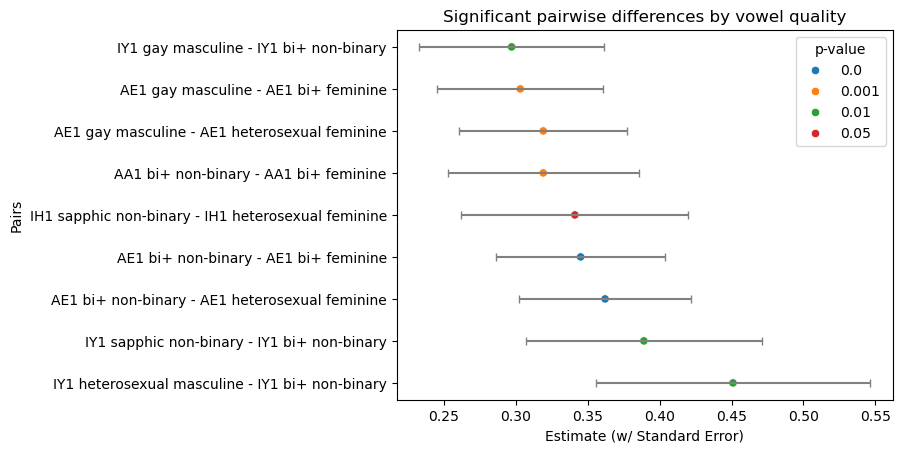

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

df_matches_sorted = df_matches.sort_values(by='estimate')

# Custom color palette with numeric keys
custom_palette = {
    0.: '#1f77b4',  # Blue
    0.001: '#ff7f0e',   # Orange
    0.01: '#2ca02c',   # Green
    0.05: '#d62728'  # Red
}

# Create scatterplot with custom hue colors
ax = sns.scatterplot(
    data=df_matches_sorted, 
    y='pairs', 
    x='estimate', 
    hue='p-rounded', 
    palette=custom_palette
)

# Add error bars manually if needed
for i in range(len(df_matches_sorted)):
    plt.errorbar(
        x=df_matches_sorted['estimate'].iloc[i],
        y=df_matches_sorted['pairs'].iloc[i],
        xerr=df_matches_sorted['SE'].iloc[i],  # Add SE as error bars
        fmt='none',  # Do not add extra markers
        ecolor='gray',  # Error bar color
        capsize=3  # Add caps to error bars
    )

# Customize the plot
plt.title('Significant pairwise differences by vowel quality')
plt.xlabel('Estimate (w/ Standard Error)')
plt.ylabel('Pairs')
plt.legend(title='p-value')
plt.show()
